# Project Name : Pizza Price Prediction

### Importing Libraries

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/drive')
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Reading the DataSet

In [8]:
df = pd.read_csv('/content/drive/MyDrive/kurs/pizza_v2.csv')

#df= pd.read_csv("pizza_v2.csv")

In [9]:
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [11]:
df.isnull().sum()

company            0
price_rupiah       0
diameter           0
topping            0
variant            0
size               0
extra_sauce        0
extra_cheese       0
extra_mushrooms    0
dtype: int64

As we can see the data is cleaned and no value is missing. So we can go to analyse data.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price_rupiah     129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


In [13]:
df.columns

Index(['company', 'price_rupiah', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

In all columns the type is object (string). But we can change the calumn price_rupiah to be a quantitative variable.

In [14]:
df.rename({'price_rupiah':'price'}, axis=1, inplace=True)
df.price = df.price.str.replace('Rp','').str.replace(',','').astype(int)
df['diameter'] = df['diameter'].str.extract('(\d+\.?\d*)').astype(float)

In [15]:
df.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,235000,22.0,chicken,double_signature,jumbo,yes,yes,no
1,A,198000,20.0,papperoni,double_signature,jumbo,yes,yes,no
2,A,120000,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,155000,14.0,smoked_beef,double_signature,reguler,yes,no,yes
4,A,248000,18.0,mozzarella,double_signature,jumbo,yes,no,yes


### Data Analysis

In [16]:
!pip install plotly.express

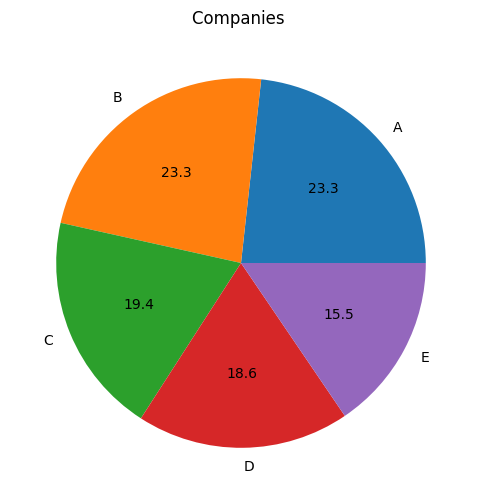

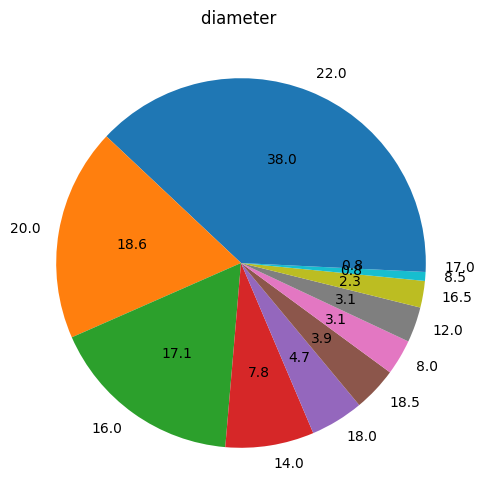

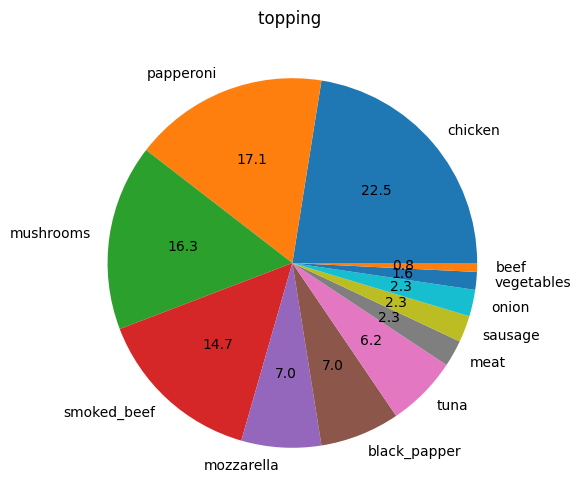

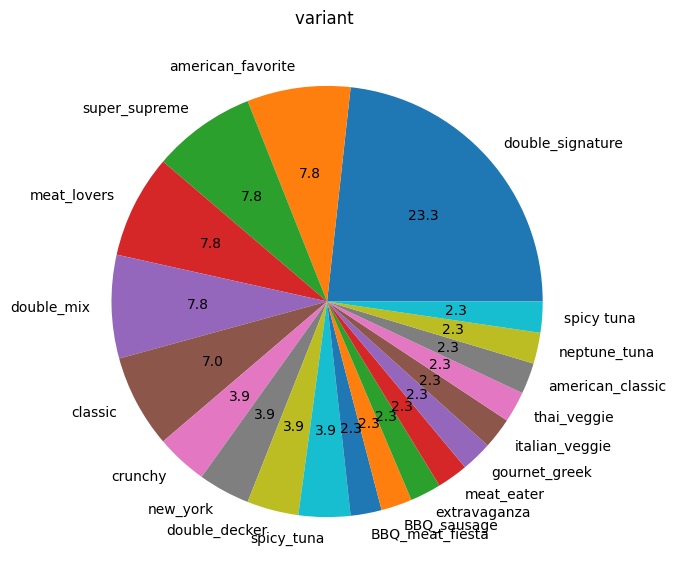

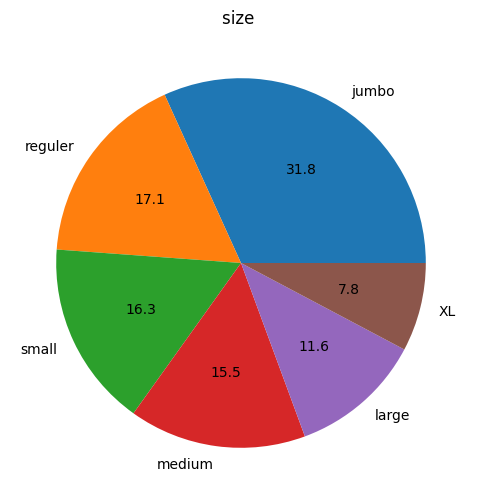

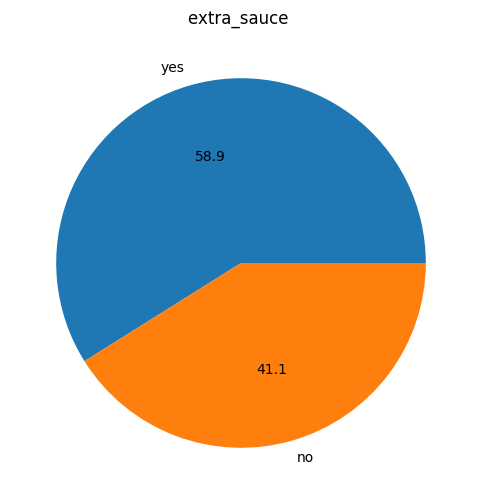

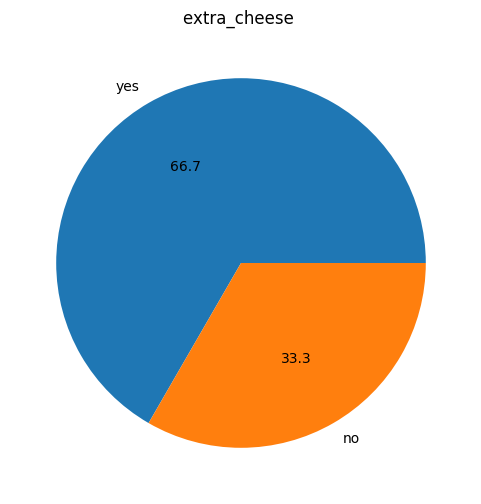

In [17]:
import plotly.express as px
plt.figure(figsize=(6,6))
plt.pie(df['company'].value_counts(),autopct='%.1f', labels= df['company'].unique())
plt.title('Companies ')
plt.show()

plt.figure(figsize=(6,6))
plt.pie(df['diameter'].value_counts(),autopct='%.1f', labels= df['diameter'].unique())
plt.title('diameter ')
plt.show()

plt.figure(figsize=(6,6))
plt.pie(df['topping'].value_counts(),autopct='%.1f', labels= df['topping'].unique())
plt.title('topping ')
plt.show()

plt.figure(figsize=(7,7))
plt.pie(df['variant'].value_counts(),autopct='%.1f', labels= df['variant'].unique())
plt.title('variant ')
plt.show()

plt.figure(figsize=(6,6))
plt.pie(df['size'].value_counts(),autopct='%.1f', labels= df['size'].unique())
plt.title('size ')
plt.show()

plt.figure(figsize=(6,6))
plt.pie(df['extra_sauce'].value_counts(),autopct='%.1f', labels= df['extra_sauce'].unique())
plt.title('extra_sauce ')
plt.show()

plt.figure(figsize=(6,6))
plt.pie(df['extra_cheese'].value_counts(),autopct='%.1f', labels= df['extra_cheese'].unique())
plt.title('extra_cheese ')
plt.show()

Let's look at ome points in different point.

<Axes: xlabel='company', ylabel='Count'>

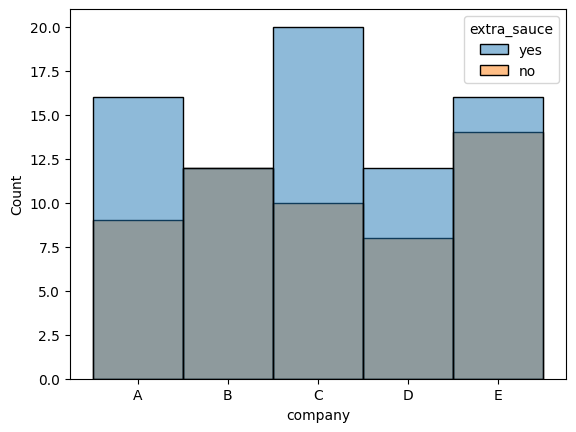

In [18]:
sns.histplot(data=df, x="company",hue='extra_sauce')

In company 'C' more people take extra_sauce and it's the highest value. In company 'B' no one is taking that one so it's no necessairly to have various type of sauce if nobody takes extra.

<Axes: xlabel='count', ylabel='Density'>

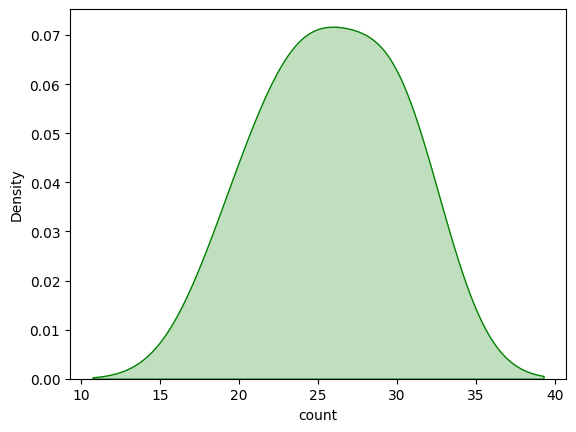

In [19]:
df_company=df.groupby('company').agg({'company':['count']})
sns.kdeplot(df['company'].value_counts(), color='g', shade=True)

<Axes: xlabel='count', ylabel='Density'>

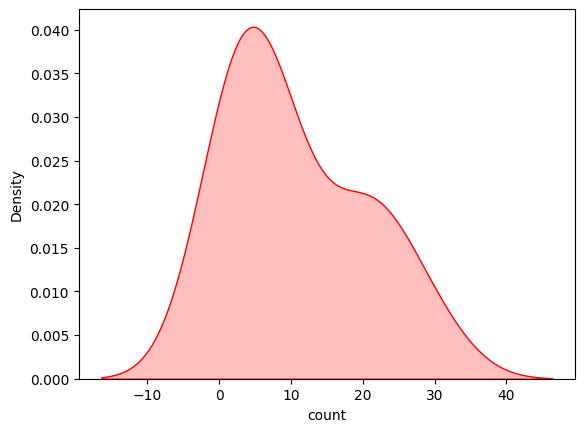

In [20]:
df_company=df.groupby('topping').agg({'topping':['count']})
sns.kdeplot(df['topping'].value_counts(), color='r', shade=True)

<Axes: xlabel='company', ylabel='Count'>

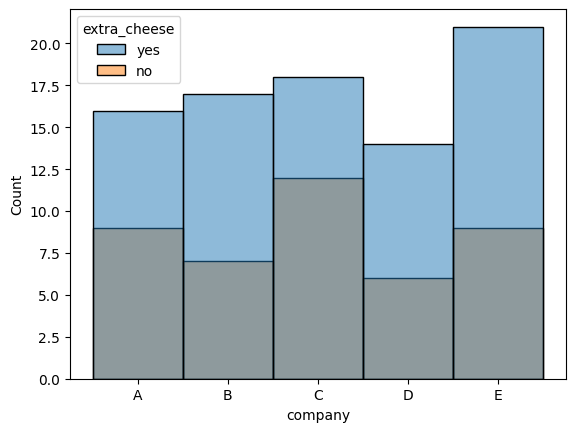

In [21]:
sns.histplot(data=df, x="company",hue='extra_cheese')

If we look to extra_cheese we can see that 60% take it. It's the most common in company 'E' where more than half of customers want it.

<Axes: xlabel='company', ylabel='Count'>

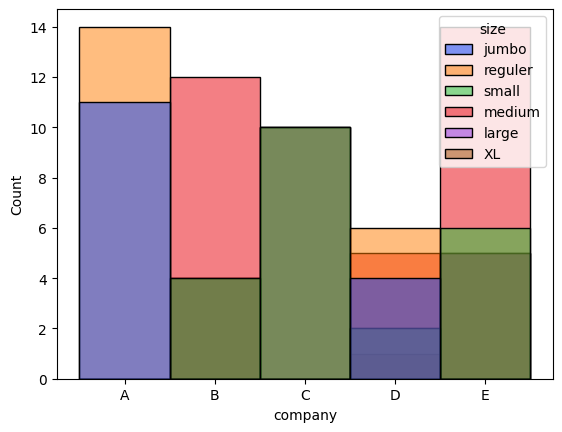

In [22]:
sns.histplot(data=df, x="company",hue='size',palette='bright')

When we look at size the most popular in company 'A' is jumbo. In company 'C' all of people take XL size. We can notice that this company has the lowest variety of size or extra_sauce because all of customers takes the same.

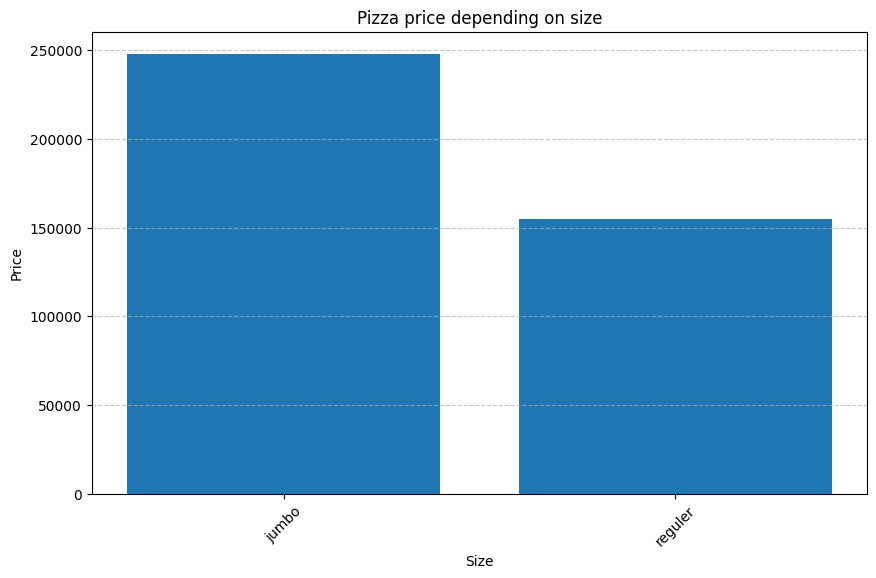

In [23]:
#sns.histplot(data=df, x='price',bins=30)
df_company_a = df[df['company'] == 'A']

plt.figure(figsize=(10, 6))
plt.bar(df_company_a['size'], df_company_a['price'])
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Pizza price depending on size')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

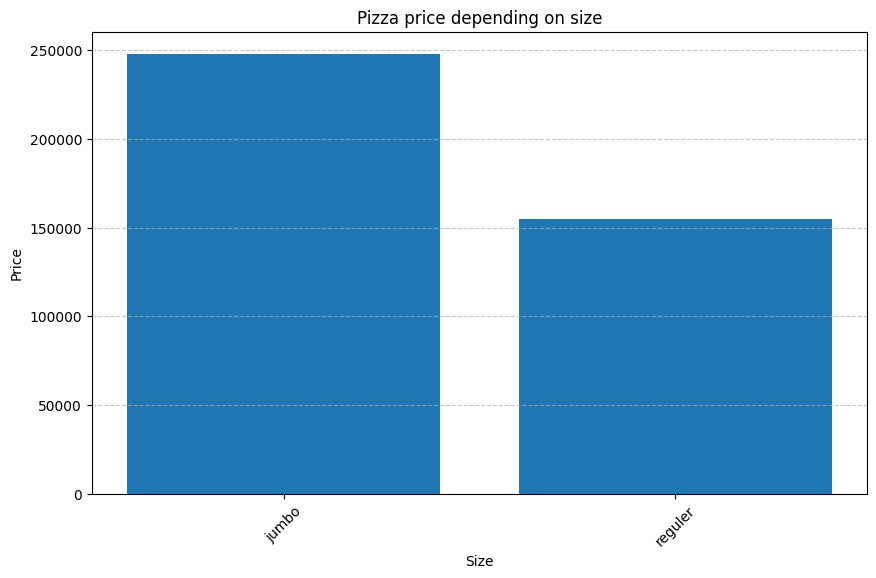

In [24]:
df_company_a = df[df['company'] == 'A']

plt.figure(figsize=(10, 6))
plt.bar(df_company_a['size'], df_company_a['price'])
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Pizza price depending on size')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
plt.show()

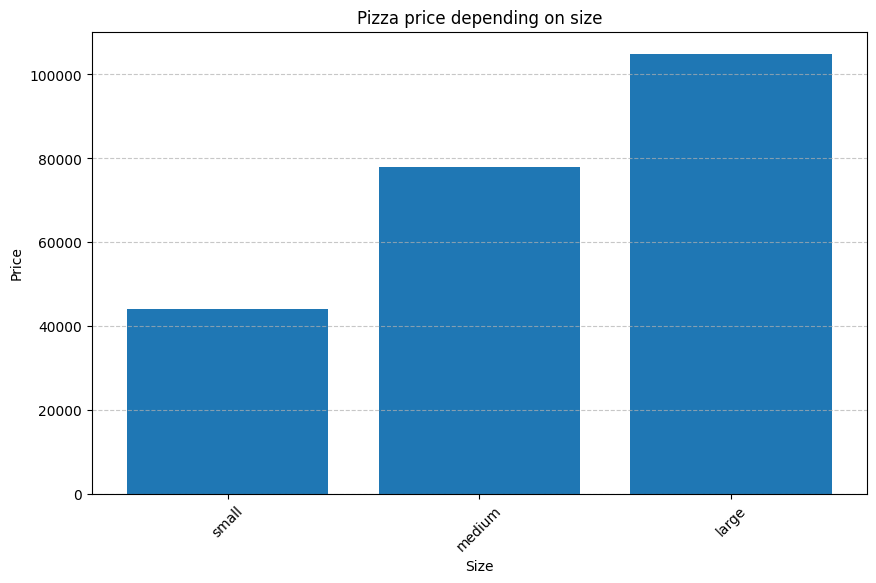

In [25]:
df_company_a = df[df['company'] == 'C']

plt.figure(figsize=(10, 6))
plt.bar(df_company_a['size'], df_company_a['price'])
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Pizza price depending on size')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

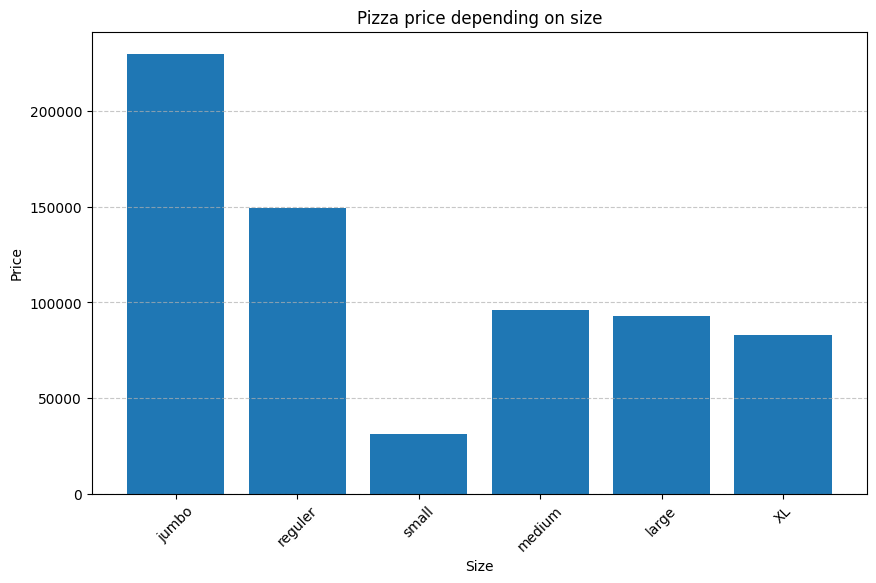

In [26]:
df_company_a = df[df['company'] == 'D']

plt.figure(figsize=(10, 6))
plt.bar(df_company_a['size'], df_company_a['price'])
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Pizza price depending on size')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

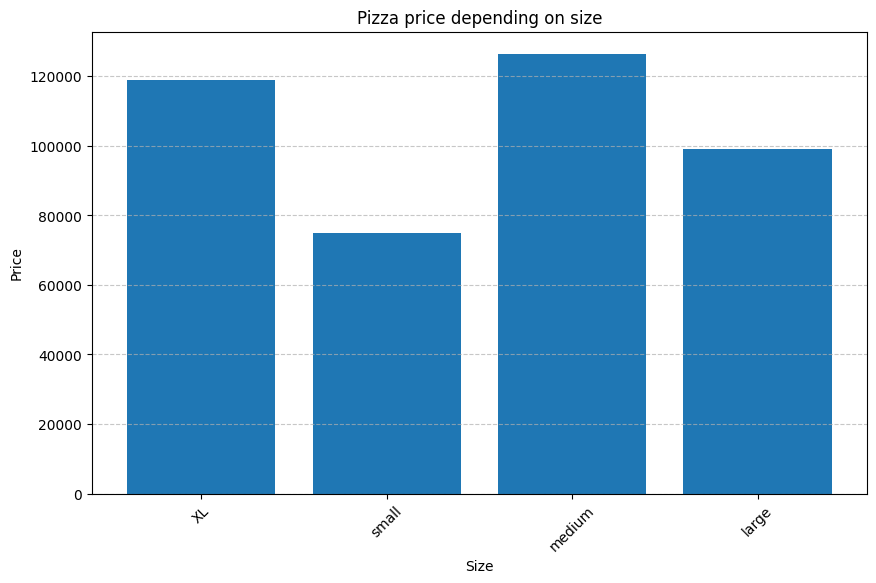

In [27]:
df_company_a = df[df['company'] == 'E']

plt.figure(figsize=(10, 6))
plt.bar(df_company_a['size'], df_company_a['price'])
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Pizza price depending on size')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

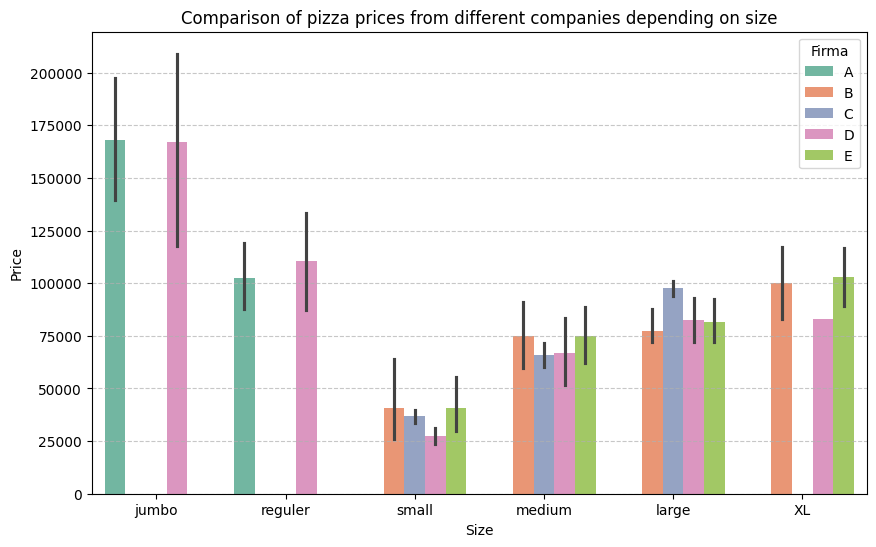

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='size', y='price', hue='company', palette='Set2')
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Comparison of pizza prices from different companies depending on size')
plt.legend(title='Firma')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [25]:
#As we can see the price of jumbo and regular pizza in company 'A' and 'D' are simmilar. The bigest deifferent we can notice in small size and XL.

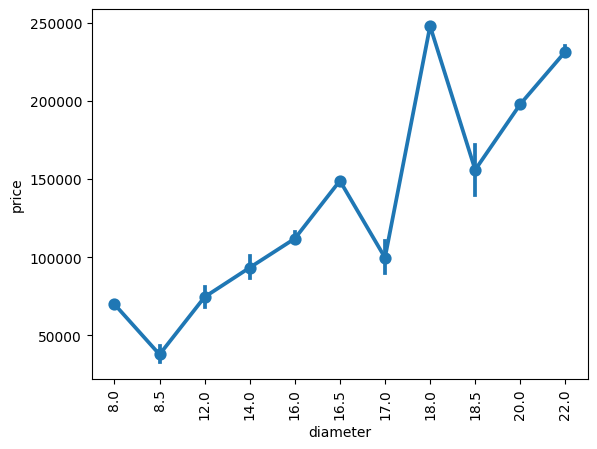

In [29]:
sns.pointplot(data=df.sort_values(by='diameter'),
              x='diameter', y='price')
plt.xticks(rotation=90);

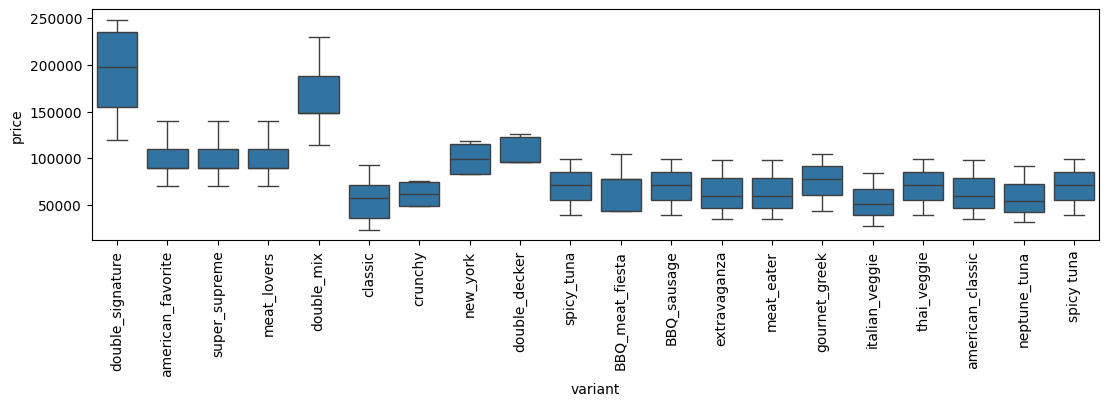

In [30]:
plt.figure(figsize=(13,3))
sns.boxplot(data=df, x='variant', y='price')
plt.xticks(rotation=90)
plt.show()

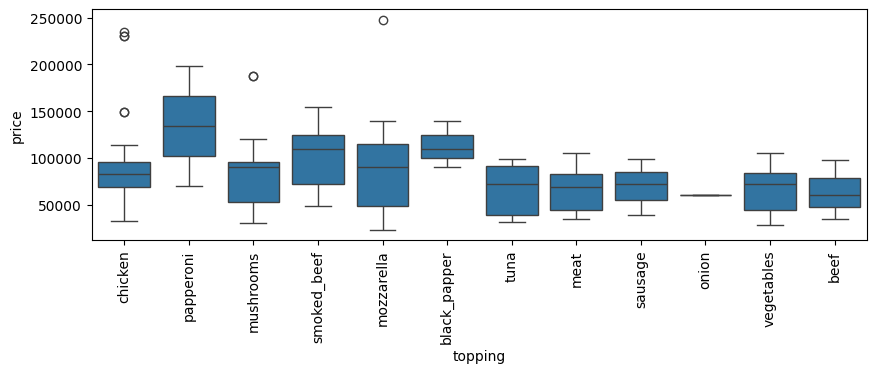

In [31]:
plt.figure(figsize=(10,3))
sns.boxplot(data=df, x='topping', y='price')
plt.xticks(rotation=90)
plt.show()

#### One Hot Encoding

The functions one_hot_encoding and one_hot use the category_encoders library to encode each specified column into a one-hot format, where each category becomes a binary column. This transformation is commonly used in machine learning preprocessing to handle categorical data.

In [32]:
!pip install category_encoders

In [38]:
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
def one_hot_encoding(df,col):
    one_hot_encoder=ce.OneHotEncoder(cols=col,return_df=True,use_cat_names=True)
    df_final = one_hot_encoder.fit_transform(df)
    return df_final
def one_hot(df, column):
    df = one_hot_encoding(df,column)
    return df

In [39]:
df = one_hot(df, 'company')
df = one_hot(df, 'topping')
df = one_hot(df, 'variant')
df = one_hot(df, 'size')
df = one_hot(df, 'extra_sauce')
df = one_hot(df, 'extra_cheese')

AttributeError: 'Series' object has no attribute 'iteritems'

In [40]:
df = one_hot(df, 'extra_mushrooms')

AttributeError: 'Series' object has no attribute 'iteritems'

In [41]:
df.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,235000,22.0,chicken,double_signature,jumbo,yes,yes,no
1,A,198000,20.0,papperoni,double_signature,jumbo,yes,yes,no
2,A,120000,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,155000,14.0,smoked_beef,double_signature,reguler,yes,no,yes
4,A,248000,18.0,mozzarella,double_signature,jumbo,yes,no,yes


In [42]:
df.dtypes

company             object
price                int64
diameter           float64
topping             object
variant             object
size                object
extra_sauce         object
extra_cheese        object
extra_mushrooms     object
dtype: object

In [43]:
x = df.drop("price",axis = 1)
y = df["price"]

In [44]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.2)

## Model Building using ML Algorithms


In [51]:
from xgboost import XGBRegressor

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
param_grid= {'n_estimators':[2000,4000,6000],
             'max_depth':[3,4,5,6],
             'learning_rate':[0.01,0.1,0.2,0.3,0.5]
}

In [54]:
final = GridSearchCV(XGBRegressor(random_state=42),
                                    param_grid=param_grid,
                                    scoring='r2')

In [55]:
X_train.head()

,company_A,company_B,company_C,company_D,company_E,diameter,topping_chicken,topping_papperoni,topping_mushrooms,topping_smoked_beef,...,size_small,size_medium,size_large,size_XL,extra_sauce_yes,extra_sauce_no,extra_cheese_yes,extra_cheese_no,extra_mushrooms_no,extra_mushrooms_yes
64,0,0,1,0,0,8.5,0,0,0,0,...,1,0,0,0,0,1,0,1,1,0
3,1,0,0,0,0,14.0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,1
106,0,0,0,0,1,8.5,0,0,1,0,...,1,0,0,0,1,0,1,0,1,0
23,1,0,0,0,0,16.5,0,0,0,1,...,0,0,0,0,1,0,0,1,1,0
76,0,0,1,0,0,8.5,0,0,0,0,...,1,0,0,0,1,0,0,1,0,1


## Fitting the model to training data

In [56]:
final.fit(X_train,Y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.5],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [2000, 4000, 6000]},
             scoring='r2')

In [57]:
final.best_params_

{'learning_rate': 0.3, 'max_depth': 4, 'n_estimators': 6000}

In [58]:
Best_param= {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 2000}

In [59]:
xgb= XGBRegressor(learning_rate= 0.2,max_depth= 6, n_estimators= 2000)

In [60]:
xgb.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [61]:
pred= xgb.predict(X_test)

In [62]:
from sklearn import metrics

In [63]:
mae = metrics.mean_absolute_error(pred, Y_test)
print(f'MAE: {mae:.5f}')

rsme = metrics.mean_squared_error(pred, Y_test, squared=False)
print(f'RMSE: {rsme:.5f}')

r2_score = metrics.r2_score(pred, Y_test)
print(f'r2 score: {r2_score:.5f}')

MAE: 5318.51893
RMSE: 11546.82318
r2 score: 0.93817


he results indicate that the XGBoost model fits the data very well. A high R2R2 suggests that the model successfully explains most of the variability in the data, even though MAE and RMSE show that forecast errors can still be significant across data units.

## SVR

In [64]:
from sklearn.svm import SVR

In [65]:
svr= SVR()

In [66]:
svr.fit(X_train,Y_train)

SVR()

In [67]:
pred1= svr.predict(X_test)

In [68]:
mae = metrics.mean_absolute_error(pred1, Y_test)
print(f'MAE: {mae:.5f}')

rsme = metrics.mean_squared_error(pred1, Y_test, squared=False)
print(f'RMSE: {rsme:.5f}')

r2_score = metrics.r2_score(pred1, Y_test)
print(f'r2 score: {r2_score:.5f}')

MAE: 38109.70200
RMSE: 48872.43819
r2 score: -64100598.71428


In [70]:
!pip install evalml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 51.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.2/215.2 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.9/587.9 kB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 60.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━

In [1]:
import evalml

In [2]:
evalml.problem_types.ProblemTypes.all_problem_types

[<ProblemTypes.BINARY: 'binary'>,
 <ProblemTypes.MULTICLASS: 'multiclass'>,
 <ProblemTypes.REGRESSION: 'regression'>,
 <ProblemTypes.TIME_SERIES_REGRESSION: 'time series regression'>,
 <ProblemTypes.TIME_SERIES_BINARY: 'time series binary'>,
 <ProblemTypes.TIME_SERIES_MULTICLASS: 'time series multiclass'>,
 <ProblemTypes.MULTISERIES_TIME_SERIES_REGRESSION: 'multiseries time series regression'>]

In [45]:
x = df.drop("price",axis = 1)
y = df["price"]

In [46]:
X_train, X_test, y_train, y_test = evalml.preprocessing.split_data(x, y, problem_type='regression')


/usr/local/lib/python3.10/dist-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/usr/local/lib/python3.10/dist-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/usr/local/lib/python3.10/dist-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/usr/local/lib/python3.10/dist-packages/woodwork/type_sys/utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. 

In [63]:
from evalml.automl import AutoMLSearch
automl = AutoMLSearch(X_train=X_train, y_train=y_train, problem_type='regression')
automl.search()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000149 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14
[LightGBM] [Info] Number of data points in the train set: 68, number of used features: 4
[LightGBM] [Info] Start training from score 90286.764706
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.498e+09, tolerance: 1.422e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.083e+09, tolerance: 1.508e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.390e+09, tolerance: 1.704e

{1: {'Random Forest Regressor w/ Imputer + One Hot Encoder + RF Regressor Select From Model': 2.985725164413452,
  'Total time of batch': 3.1489291191101074},
 2: {'Extra Trees Regressor w/ Select Columns By Type Transformer + Imputer + Select Columns Transformer + Select Columns Transformer + Imputer + One Hot Encoder': 1.321134328842163,
  'XGBoost Regressor w/ Select Columns By Type Transformer + Imputer + Select Columns Transformer + Select Columns Transformer + Imputer + One Hot Encoder': 1.0278024673461914,
  'LightGBM Regressor w/ Select Columns By Type Transformer + Imputer + Select Columns Transformer + Select Columns Transformer + Imputer + One Hot Encoder': 1.0077447891235352,
  'Elastic Net Regressor w/ Select Columns By Type Transformer + Imputer + Standard Scaler + Select Columns Transformer + Select Columns Transformer + Imputer + One Hot Encoder + Standard Scaler': 1.2310729026794434,
  'Total time of batch': 5.378774881362915}}

In [48]:
automl.rankings

,id,pipeline_name,search_order,ranking_score,mean_cv_score,standard_deviation_cv_score,percent_better_than_baseline,high_variance_cv,parameters
0,3,XGBoost Regressor w/ Select Columns By Type Tr...,3,0.912034,0.912034,0.062908,24911.701808,False,{'Numeric Pipeline - Select Columns By Type Tr...
1,1,Random Forest Regressor w/ Imputer + One Hot E...,1,0.826038,0.826038,0.101962,22572.208645,False,{'Imputer': {'categorical_impute_strategy': 'm...
2,2,Extra Trees Regressor w/ Select Columns By Typ...,2,0.816084,0.816084,0.067757,22301.416748,False,{'Numeric Pipeline - Select Columns By Type Tr...
3,5,Elastic Net Regressor w/ Select Columns By Typ...,5,0.790509,0.790509,0.087224,21605.662321,False,{'Numeric Pipeline - Select Columns By Type Tr...
4,4,LightGBM Regressor w/ Select Columns By Type T...,4,0.359802,0.359802,0.021041,9888.343887,False,{'Numeric Pipeline - Select Columns By Type Tr...
5,0,Mean Baseline Regression Pipeline,0,-0.003676,-0.003676,0.002663,0.000000,False,{'Baseline Regressor': {'strategy': 'mean'}}


In [49]:
automl.best_pipeline

pipeline = RegressionPipeline(component_graph={'Numeric Pipeline - Select Columns By Type Transformer': ['Select Columns By Type Transformer', 'X', 'y'], 'Numeric Pipeline - Imputer': ['Imputer', 'Numeric Pipeline - Select Columns By Type Transformer.x', 'y'], 'Numeric Pipeline - Select Columns Transformer': ['Select Columns Transformer', 'Numeric Pipeline - Imputer.x', 'y'], 'Categorical Pipeline - Select Columns Transformer': ['Select Columns Transformer', 'X', 'y'], 'Categorical Pipeline - Imputer': ['Imputer', 'Categorical Pipeline - Select Columns Transformer.x', 'y'], 'Categorical Pipeline - One Hot Encoder': ['One Hot Encoder', 'Categorical Pipeline - Imputer.x', 'y'], 'XGBoost Regressor': ['XGBoost Regressor', 'Numeric Pipeline - Select Columns Transformer.x', 'Categorical Pipeline - One Hot Encoder.x', 'y']}, parameters={'Numeric Pipeline - Select Columns By Type Transformer':{'column_types': ['category', 'EmailAddress', 'URL'], 'exclude': True}, 'Numeric Pipeline - Imputer':{

In [50]:
best_pipeline=automl.best_pipeline

In [51]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"])



***********************************************************************************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:
***********************************************************************************************************************************************************


* XGBoost Regressor w/ Select Columns By Type Transformer + Imputer + Select Columns Transformer + Select Columns Transformer + Imputer + One Hot Encoder *


INFO:evalml.pipelines.pipeline_base.describe:* XGBoost Regressor w/ Select Columns By Type Transformer + Imputer + Select Columns Transformer + Select Columns Transformer + Imputer + One Hot Encoder *


***********************************************************************************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:***********************************************************************************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:


Problem Type: regression


INFO:evalml.pipelines.pipeline_base.describe:Problem Type: regression


Model Family: XGBoost


INFO:evalml.pipelines.pipeline_base.describe:Model Family: XGBoost


INFO:evalml.pipelines.pipeline_base.describe:


Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:==============


1. Select Columns By Type Transformer


INFO:evalml.pipelines.component_graph.describe:1. Select Columns By Type Transformer


	 * column_types : ['category', 'EmailAddress', 'URL']


INFO:evalml.pipelines.components.component_base.describe:	 * column_types : ['category', 'EmailAddress', 'URL']


	 * exclude : True


INFO:evalml.pipelines.components.component_base.describe:	 * exclude : True


2. Imputer


INFO:evalml.pipelines.component_graph.describe:2. Imputer


	 * categorical_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_impute_strategy : most_frequent


	 * numeric_impute_strategy : mean


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_impute_strategy : mean


	 * boolean_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_impute_strategy : most_frequent


	 * categorical_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_fill_value : None


	 * numeric_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_fill_value : None


	 * boolean_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_fill_value : None


3. Select Columns Transformer


INFO:evalml.pipelines.component_graph.describe:3. Select Columns Transformer


	 * columns : ['diameter', 'extra_sauce', 'extra_cheese']


INFO:evalml.pipelines.components.component_base.describe:	 * columns : ['diameter', 'extra_sauce', 'extra_cheese']


4. Select Columns Transformer


INFO:evalml.pipelines.component_graph.describe:4. Select Columns Transformer


	 * columns : ['company', 'topping', 'variant', 'size']


INFO:evalml.pipelines.components.component_base.describe:	 * columns : ['company', 'topping', 'variant', 'size']


5. Imputer


INFO:evalml.pipelines.component_graph.describe:5. Imputer


	 * categorical_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_impute_strategy : most_frequent


	 * numeric_impute_strategy : mean


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_impute_strategy : mean


	 * boolean_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_impute_strategy : most_frequent


	 * categorical_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_fill_value : None


	 * numeric_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_fill_value : None


	 * boolean_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_fill_value : None


6. One Hot Encoder


INFO:evalml.pipelines.component_graph.describe:6. One Hot Encoder


	 * top_n : 10


INFO:evalml.pipelines.components.component_base.describe:	 * top_n : 10


	 * features_to_encode : None


INFO:evalml.pipelines.components.component_base.describe:	 * features_to_encode : None


	 * categories : None


INFO:evalml.pipelines.components.component_base.describe:	 * categories : None


	 * drop : if_binary


INFO:evalml.pipelines.components.component_base.describe:	 * drop : if_binary


	 * handle_unknown : ignore


INFO:evalml.pipelines.components.component_base.describe:	 * handle_unknown : ignore


	 * handle_missing : error


INFO:evalml.pipelines.components.component_base.describe:	 * handle_missing : error


7. XGBoost Regressor


INFO:evalml.pipelines.component_graph.describe:7. XGBoost Regressor


	 * eta : 0.1


INFO:evalml.pipelines.components.component_base.describe:	 * eta : 0.1


	 * max_depth : 6


INFO:evalml.pipelines.components.component_base.describe:	 * max_depth : 6


	 * min_child_weight : 1


INFO:evalml.pipelines.components.component_base.describe:	 * min_child_weight : 1


	 * n_estimators : 100


INFO:evalml.pipelines.components.component_base.describe:	 * n_estimators : 100


	 * n_jobs : -1


INFO:evalml.pipelines.components.component_base.describe:	 * n_jobs : -1


INFO:evalml.automl.automl_search.describe_pipeline:


Training


INFO:evalml.automl.automl_search.describe_pipeline:Training


INFO:evalml.automl.automl_search.describe_pipeline:========


Training for regression problems.


INFO:evalml.automl.automl_search.describe_pipeline:Training for regression problems.


Total training time (including CV): 4.6 seconds


INFO:evalml.automl.automl_search.describe_pipeline:Total training time (including CV): 4.6 seconds


INFO:evalml.automl.automl_search.describe_pipeline:


Cross Validation


INFO:evalml.automl.automl_search.describe_pipeline:Cross Validation


----------------


INFO:evalml.automl.automl_search.describe_pipeline:----------------


               R2  ExpVariance  MaxError  MedianAE           MSE      MAE  Root Mean Squared Error # Training # Validation
0           0.982        0.982 20638.992  2076.523  44883181.541 4648.112                 6699.491         68           35
1           0.861        0.861 82605.094  2405.316 330381849.183 8561.555                18176.409         69           34
2           0.893        0.900 48257.938  6431.859 193849983.838 9235.573                13923.002         69           34
mean        0.912        0.915 50500.674  3637.900 189705004.854 7481.747                12932.967          -            -
std         0.063        0.062 31043.870  2425.218 142794460.482 2477.032                 5802.158          -            -
coef of var 0.069        0.068     0.615     0.667         0.753    0.331                    0.449          -            -


INFO:evalml.automl.automl_search.describe_pipeline:               R2  ExpVariance  MaxError  MedianAE           MSE      MAE  Root Mean Squared Error # Training # Validation
0           0.982        0.982 20638.992  2076.523  44883181.541 4648.112                 6699.491         68           35
1           0.861        0.861 82605.094  2405.316 330381849.183 8561.555                18176.409         69           34
2           0.893        0.900 48257.938  6431.859 193849983.838 9235.573                13923.002         69           34
mean        0.912        0.915 50500.674  3637.900 189705004.854 7481.747                12932.967          -            -
std         0.063        0.062 31043.870  2425.218 142794460.482 2477.032                 5802.158          -            -
coef of var 0.069        0.068     0.615     0.667         0.753    0.331                    0.449          -            -


In [52]:
best_pipeline.score(X_test, y_test, objectives=["R2"])

OrderedDict([('R2', 0.9715820217473693)])

#Making a model based on R2 objective

In [53]:
automl_r2 = AutoMLSearch(X_train=X_train, y_train=y_train,
                          problem_type='regression',
                          objective='R2',

                          max_batches=1,
                          optimize_thresholds=True)

automl_r2.search()

{1: {'Random Forest Regressor w/ Imputer + One Hot Encoder + RF Regressor Select From Model': 3.810124158859253,
  'Total time of batch': 3.9707207679748535}}

In [54]:
automl_r2.rankings

,id,pipeline_name,search_order,ranking_score,mean_cv_score,standard_deviation_cv_score,percent_better_than_baseline,high_variance_cv,parameters
0,1,Random Forest Regressor w/ Imputer + One Hot E...,1,0.826038,0.826038,0.101962,22572.208645,False,{'Imputer': {'categorical_impute_strategy': 'm...
1,0,Mean Baseline Regression Pipeline,0,-0.003676,-0.003676,0.002663,0.000000,False,{'Baseline Regressor': {'strategy': 'mean'}}


In [64]:
#automl_r2.describe_pipeline(automl_auc.rankings.iloc[0]["id"])

NameError: name 'automl_auc' is not defined

In [57]:
best_pipeline_r2 = automl_r2.best_pipeline


In [58]:
best_pipeline_r2.score(X_test, Y_test,  objectives=["R2"])

OrderedDict([('R2', -0.450928807897794)])

In [59]:
best_pipeline.save("model.pkl")

In [60]:
final_model=automl.load('model.pkl')

In [61]:
final_model.predict(X_test)

40      72206.789062
24     149098.921875
107     68437.335938
51      97306.882812
8       91325.867188
122     84015.000000
44      47711.492188
104     84015.000000
73      31905.609375
7       74005.296875
60      96609.773438
10     139330.531250
90      48393.300781
97      92116.929688
30      96085.820312
33      92088.523438
2      136037.406250
59      64252.902344
50      66659.843750
26      48317.929688
22     113546.968750
109     73265.046875
48      96446.078125
68      67131.632812
92      51188.257812
124     40121.335938
Name: price, dtype: float64

MAE says that the model predictions are on average deviated from actual values ​​by this amount. This is a very high error, which means the model is not effective

